# Import Libraries

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import cv2
import matplotlib.pyplot as plt
import os

# Accessory Functions

In [2]:
def makeWorld(world_size,robot_details):
    ''' Function to make the world and set the initial state'''
    world = np.full((world_size[0],world_size[1],3),255)
    world = world.astype(np.uint8)
    mirror_world = np.copy(world)
    
    for i in range(len(robot_details)):
        cv2.circle(mirror_world,robot_details[i]['position'],robot_details[i]['radius'],robot_details[i]['color'],2)
        cv2.circle(mirror_world,robot_details[i]['goal'],5,robot_details[i]['color'],-1)
        cv2.circle(world,robot_details[i]['goal'],5,robot_details[i]['color'],-1)

    plt.imshow(mirror_world)
    plt.title("Initial State of the World")
    plt.show()
    print("In the above image, hollow circles represent robots and small solid circles represent goals.\n\
    Note: The goal of a robot is marked by the same colour as the robot circle.\n")
    return world

def assignRandomColor(channel_count = 3):
    ''' Function which if called chooses a random colour to be assigned to a robot'''
    color = np.random.choice(range(256), size=channel_count)
    return tuple((int(color[0]), int(color[1]), int(color[2])))
    
def addRobot(robot_details,start,goal,radius,color=None):
    ''' This function adds details about a robot like its start location, goal, radius, colour etc. 
    to the robot_details array'''
    my_dict = {}
    my_dict['position']=start
    my_dict['goal']=goal
    my_dict['radius']=radius
    if color == None:
        my_dict['color']=assignRandomColor(3)
    else:
        my_dict['color']=color
    robot_details.append(my_dict)
    return robot_details

# Solver Functions

In [3]:
def getValidVels(robot_position,v_min,v_max):
    x = np.arange(0, world.shape[1])
    y = np.arange(0, world.shape[0])
    vel_square = (x[np.newaxis,:]-robot_position[0])**2 + (y[:,np.newaxis]-robot_position[1])**2
    mask = np.logical_and(vel_square >= v_min**2, vel_square <= v_max**2)
    valid_vels = np.vstack(np.where(mask == 1)[::-1]).T
    return valid_vels

def eulerDistance(A,B):
    if A.shape != B.shape:
        print("Given matrices have different shape. Can't caluculate euler distance ... returning None")
        return None
    dist = 0
    for i in range(len(A)):
        dist+= (A[i]-B[i])**2
    return dist

def getDistances(x,y,robot_position):
    distance_square = (x[np.newaxis,:]-robot_position[0])**2 + (y[:,np.newaxis]-robot_position[1])**2 
    return distance_square


def solver(world,robot_details,v_min, v_max,distance_threshold,save_outputs=False, save_location=None,max_itr=500):
    ''' Main solver function. Details of the variables are as follows:
    world: The world in which the robots are operating
    robot_details: The array which stores details of all robots like their position, goal etc.
    v_min: Minimum velocity which a robot is allowed to take
    v_max: Maximum velocity which a robot is allowed to take
    distance_threshold: If the robot is within threshold distance of the goal, we stop the algo.
    save_outputs: If set to true, the outputs of the solver get to path specified by save_location
    save_location: Path of location where the outputs must be saved
    max_itr: If the is not solved even after max_itr number of iterations, then we exit without solving'''
    
    # If outputs need to be saved but location is not specified, then set save_location to present directory
    if save_outputs == True and save_location == None:
        save_location = "."
        
    successful_robots = [] # List of robots which have reached goal location
    itr_count = 0 # Count of number of iterations
    
    while itr_count < max_itr:
        print("Iteration Number - %d"%(itr_count+1))
        for i in range(len(robot_details)):
            if i in successful_robots:
                continue
            valid_vels = getValidVels(robot_details[i]['position'],v_min,v_max)
            
            for j in range(len(robot_details)):
                if i == j:
                    continue
                x = np.arange(0, world.shape[1])
                y = np.arange(0, world.shape[0])
                distance_square = getDistances(x,y,robot_details[j]['position'])
                mask = distance_square < (robot_details[i]['radius'] + robot_details[j]['radius'])**2
                A = np.ravel_multi_index(valid_vels.T[::-1, :], world.shape[:2])
                B = np.ravel_multi_index(np.vstack(np.where(mask==1)), world.shape[:2])
                set_diff = np.setdiff1d(A,B)
                valid_vels = np.vstack(np.unravel_index(set_diff,world.shape[:2])).T[:,::-1]
                
            robot_details[i]['position'] = valid_vels[cdist(valid_vels, np.array(robot_details[i]['goal']).reshape(1, -1)).argmin(axis = 0)].tolist()[0]

            if eulerDistance(np.array(robot_details[i]['position']), np.array(robot_details[i]['goal'])) < distance_threshold: 
                successful_robots.append(i)

        mirror_world = world.copy()

        for j in range(len(robot_details)):
            cv2.circle(mirror_world, tuple(robot_details[j]['position']), robot_details[j]['radius'], robot_details[j]['color'], 2)
        plt.imshow(mirror_world)
        plt.show()
        itr_count+=1
        if save_outputs:
            cv2.imwrite(save_location+"/"+str(itr_count)+".jpg",mirror_world)
            print("Saved output to %s"%save_location)
        if len(successful_robots) == len(robot_details):
            break
    print("### Completed solving problem in %d iterations ###" %(itr_count))


# Main

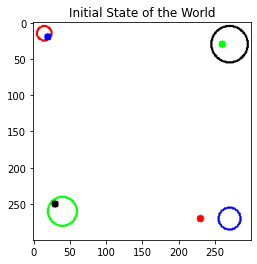

In the above image, hollow circles represent robots and small solid circles represent goals.
    Note: The goal of a robot is marked by the same colour as the robot circle.

Showing solver outputs below


Iteration Number - 1


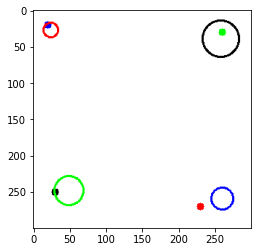

Iteration Number - 2


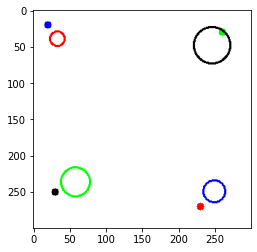

Iteration Number - 3


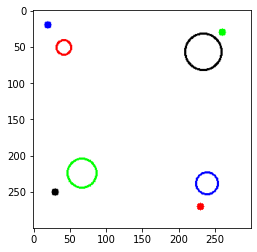

Iteration Number - 4


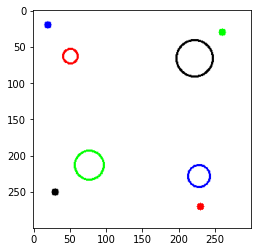

Iteration Number - 5


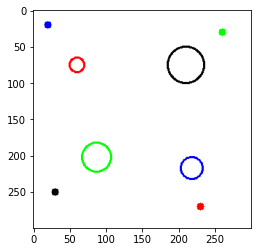

Iteration Number - 6


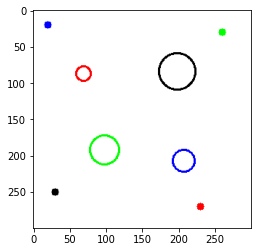

Iteration Number - 7


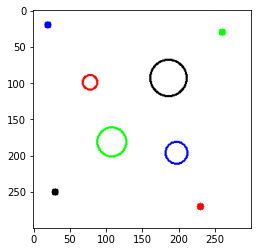

Iteration Number - 8


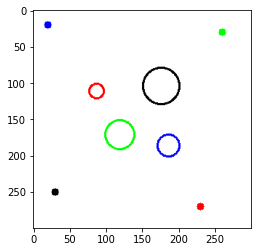

Iteration Number - 9


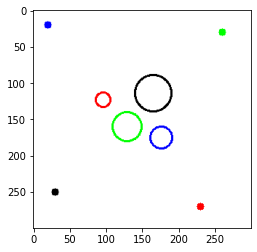

Iteration Number - 10


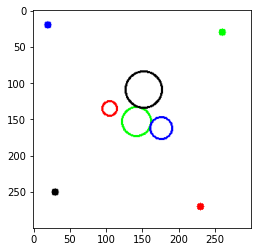

Iteration Number - 11


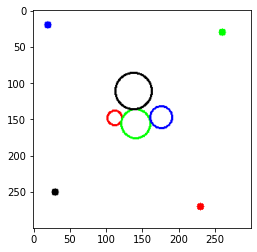

Iteration Number - 12


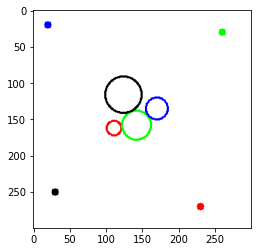

Iteration Number - 13


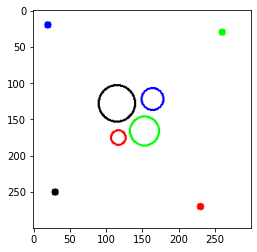

Iteration Number - 14


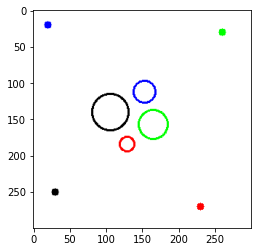

Iteration Number - 15


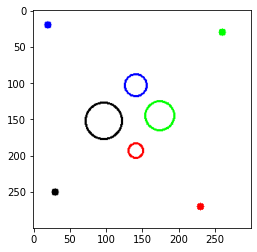

Iteration Number - 16


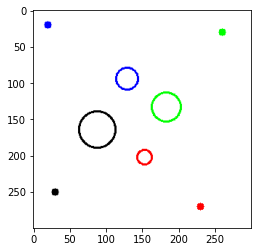

Iteration Number - 17


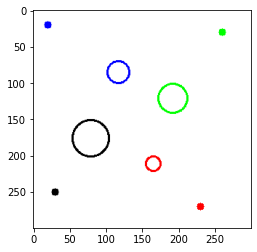

Iteration Number - 18


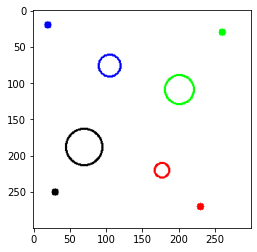

Iteration Number - 19


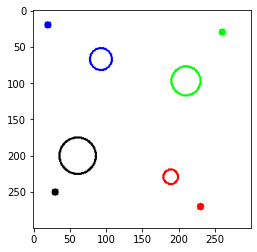

Iteration Number - 20


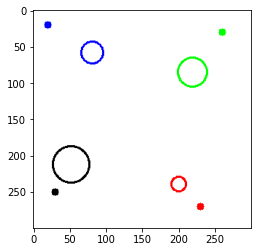

Iteration Number - 21


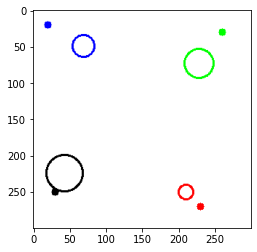

Iteration Number - 22


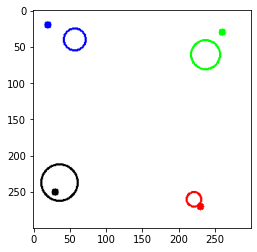

Iteration Number - 23


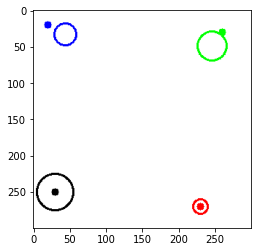

Iteration Number - 24


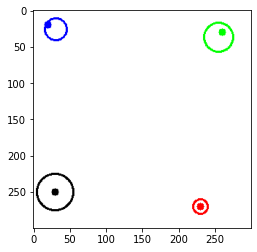

Iteration Number - 25


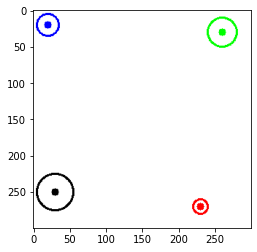

### Completed solving problem in 25 iterations ###


In [4]:
######################## Any changes (if needed) must be made in this cell ########################
world_size = (300,300)
robot_details = []

'''To make changes to number of robots, robot start and goal points etc., modify the lines below '''

# robot_details = addRobot(robot_details, start=(15,15), goal=(220,200), radius=10, color=(255,0,0))
# robot_details = addRobot(robot_details, start=(75,50), goal=(200,100), radius=20, color=(0,255,0))
# robot_details = addRobot(robot_details, start=(150,75), goal=(285,285), radius=15, color=(0,0,255))
# robot_details = addRobot(robot_details, start=(100,120),goal=(250,150), radius=25, color=(0,0,0))

robot_details = addRobot(robot_details, start=(15,15), goal=(230,270), radius=10, color=(255,0,0))
robot_details = addRobot(robot_details, start=(40,260), goal=(260,30), radius=20, color=(0,255,0))
robot_details = addRobot(robot_details, start=(270,270), goal=(20,20), radius=15, color=(0,0,255))
robot_details = addRobot(robot_details, start=(270,30),goal=(30,250), radius=25, color=(0,0,0))

world = makeWorld(world_size,robot_details)
print("Showing solver outputs below\n\n")

'''To save the outputs, set save_outputs to "True" and provide a path to the variable save_location'''
# solver(world,robot_details,v_min=2,v_max=15,distance_threshold=5,save_outputs=True,save_location="./outputs")
solver(world,robot_details,v_min=2,v_max=15,distance_threshold=5)